# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [10]:
#sex: sexo (1 = male; 0 = female) 
x = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
x

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [20]:
#quantidade média de doentes
qtd_media =  round(x.iloc[2,1]/x.iloc[2,2],2)
qtd_media

0.46

In [29]:
#Odds

qtd_mulher = round(x.iloc[0,1]/x.iloc[0,0],2)
qtd_homem = round(x.iloc[1,1]/x.iloc[1,0],2)
qtd_total = round(x.iloc[2,1]/x.iloc[2,0],2)

print(f'Odds de mulher : {qtd_mulher}')
print(f'Odds de homem : {qtd_homem}')
print(f'Odds Total : {qtd_total}')

Odds de mulher : 0.35
Odds de homem : 1.24
Odds Total : 0.85


In [87]:
#Odds ratio (Use o total como referência)
mulher_homem = round((qtd_mulher/qtd_homem),2)
mulher_total = round((qtd_mulher/qtd_total),2)
homem_total = round((qtd_homem/qtd_total),2)
print(f'Mulher tem {mulher_homem} vezes menos chances de ficar doente do que homem.')
print(f'Mulher tem {mulher_total} vezes menos chances de ficar doente do que total.')
print(f'Homem tem {homem_total} vezes mais chances de ficar doente do que total.')

Mulher tem 0.28 vezes menos chances de ficar doente do que homem.
Mulher tem 0.41 vezes menos chances de ficar doente do que total.
Homem tem 1.46 vezes mais chances de ficar doente do que total.


In [88]:
#Logito (LOG(Odds))
log_o_mulher = np.log(qtd_mulher)
log_o_homem = np.log(qtd_homem)
log_o_total = np.log(qtd_total)

In [96]:
#O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE)
Log_or_mulher_homem = np.log(mulher_homem)
Log_or_mulher_total = np.log(mulher_total)
Log_or_homem_total = np.log(homem_total)

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [90]:
a = df['age'].sort_values()
a

132    29.0
101    34.0
225    34.0
283    35.0
117    35.0
       ... 
42     71.0
103    71.0
233    74.0
257    76.0
161    77.0
Name: age, Length: 303, dtype: float64

In [91]:
# (29 - 39)  , (40 - 49) , (50 - 59) , (60 - 69) , (70 - 79)

df.loc[df['age'] < 39,'idade'] = 'muito novo'
df.loc[(df['age'] > 39) & (df['age'] < 49) ,'idade'] = 'novo'
df.loc[(df['age'] > 49) & (df['age'] < 59) ,'idade'] = 'normal'
df.loc[(df['age'] > 59) & (df['age'] < 69) ,'idade'] = 'velho'
df.loc[df['age'] > 69,'idade'] = 'muito velho'
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,idade
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,velho
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,velho
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,velho
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,muito novo
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,novo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,novo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,velho
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,normal
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,normal


In [92]:
#media da variavel age

media = (df['age'].sum())/len(df['age'])
media

54.43894389438944

In [93]:
y = pd.crosstab(df['idade'], df['flag_doente'], margins=True)
y

flag_doente,0,1,All
idade,,,
muito novo,8,3,11
muito velho,16,16,32
normal,60,51,111
novo,47,20,67
velho,30,48,78
All,161,138,299


In [98]:
qtd_muito_novo = round(y.iloc[0,1]/y.iloc[0,0],2)
qtd_novo = round(y.iloc[3,1]/y.iloc[3,0],2)
qtd_normal = round(y.iloc[2,1]/y.iloc[2,0],2)
qtd_velho = round(y.iloc[4,1]/y.iloc[4,0],2)
qtd_muito_velho = round(y.iloc[1,1]/y.iloc[1,0],2)
qtd_total2 = round(y.iloc[5,1]/y.iloc[5,0],2)

print(f'Odds de muito_novo : {qtd_muito_novo}')
print(f'Odds de novo : {qtd_novo}')
print(f'Odds normal : {qtd_normal}')
print(f'Odds de velho : {qtd_velho}')
print(f'Odds de muito_velho : {qtd_muito_velho}')
print(f'Odds Total : {qtd_total2}')

Odds de muito_novo : 0.38
Odds de novo : 0.43
Odds normal : 0.85
Odds de velho : 1.6
Odds de muito_velho : 1.0
Odds Total : 0.86


In [99]:
#Odds Ratio (total)

In [101]:
muito_novo_total = round((qtd_muito_novo/qtd_total2),2)
novo_total = round((qtd_novo/qtd_total2),2)
normal_total = round((qtd_normal/qtd_total2),2)
velho_total = round((qtd_velho/qtd_total2),2)
muito_velho_total = round((qtd_muito_velho/qtd_total2),2)
print(f'Muito novo tem {muito_novo_total} vezes menos chances de ficar doente do que total.')
print(f'Normal tem {normal_total} vezes mais chances de ficar doente do que total.')
print(f'Novo tem {novo_total} vezes menos chances de ficar doente do que total.')
print(f'Velho tem {velho_total} vezes mais chances de ficar doente do que total.')
print(f'Muito velho tem {muito_velho_total} vezes mais chances de ficar doente do que total.')

Muito novo tem 0.44 vezes menos chances de ficar doente do que total.
Normal tem 0.99 vezes mais chances de ficar doente do que total.
Novo tem 0.5 vezes menos chances de ficar doente do que total.
Velho tem 1.86 vezes mais chances de ficar doente do que total.
Muito velho tem 1.16 vezes mais chances de ficar doente do que total.


In [102]:
#log Odds
log_o_mn = np.log(qtd_muito_novo)
log_o_novo = np.log(qtd_novo)
log_o_normal = np.log(qtd_normal)
log_o_velho = np.log(qtd_velho)
log_o_mv = np.log(qtd_muito_velho)
log_o_total = np.log(qtd_total2)

In [103]:
#log Oddds Ratio
log_or_mulher_mn = np.log(muito_novo_total)
log_or_mulher_novo = np.log(novo_total)
log_or_homem_normal = np.log(normal_total)
log_or_mulher_velho = np.log(velho_total)
log_or_homem_mv = np.log(muito_velho_total)

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

In [134]:
x.rename(columns={0:'Saudável',1:'Doente'}, index={0:'Feminino',1:'Masculino'}, inplace=True)


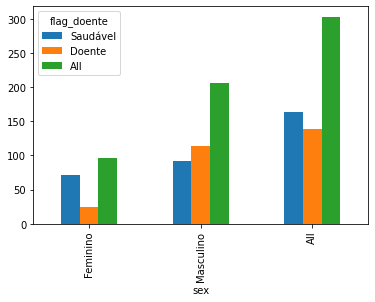

In [135]:
plot_sex = x.plot.bar()

In [139]:
y.rename(columns={0:'Saudável',1:'Doente'} ,inplace=True)

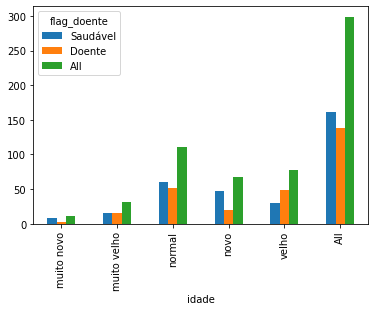

In [140]:
plot_idade = y.plot.bar()